In [1]:
#Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing machine learning libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("JobMarketData.csv")
df

Role  \
0               Data Scientist   
1    Machine Learning Engineer   
2               Data Scientist   
3    Machine Learning Engineer   
4               Data Scientist   
..                         ...   
383  Machine Leaening Engineer   
384               Data Analyst   
385             Data Scientist   
386             Data Scientist   
387             Data Scientist   

                                            Companies               Location  \
0                                               2Coms              New Delhi   
1                                               2Coms                 Mumbai   
2                           2Coms Consulting Pvt Ltd.     Chennai, Bengaluru   
3                           2Coms Consulting Pvt Ltd.  Chennai, Pune, Mumbai   
4    3D India Staffing Research & Consulting Co India              Bengaluru   
..                                                ...                    ...   
383                           Teksun Microsys Pvt Ltd              Ahmedabad   
384                                        Nike India              Bengaluru   
385                                    Simulation Hub                   Pune   
386                         NEEMTREE INTERNET PVT LTD                Gurgaon   
387                                              GSTN                  Delhi   

      Experience                                             Skills  \
0    2 - 7 years  DataModeling\nEnterpriseApplications\nAnalytic...   
1        0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...   
2       6-11 Yrs  Machine Learning Code DataScience R Data Model...   
3        3-8 Yrs  DataScience\nR\nNLP\nAlgorithms\nArtificialInt...   
4       8-13 Yrs  Team Handling\nSegmentation\nOperations Resear...   
..           ...                                                ...   
383      0-3 Yrs                          Python\nSQL\nDeepLearning   
384      0-5 Yrs    MachineLearning\nDataAnalytics\nOperations\nSQL   
385      1-3 Yrs  DataVisualization\nInformationTechnology\nAnal...   
386      4-8 Yrs            BusinessIntelligence\nAnalytics\nPython   
387      3-5 Yrs              MachineLearning\nDeepLearning\nPython   

    Company Size Eligibility Criteria Enrollment Type               Salary  \
0            838               B.Tech       Freelance      1000000-2000000   
1           4000                   UG       Full Time      1800000-3300000   
2          10000                  Phd       Full Time        160000-185000   
3          10000               PG/Phd       Full Time      1200000-2100000   
4            200                  Phd       Full Time      5000000-1700000   
..           ...                  ...             ...                  ...   
383          500                   UG       Full Time        400000-600000   
384        75400                   UG       Full Time        400000-600000   
385          200                   UG       Full Time       800000-1000000   
386           50                   UG       Full Time                  NaN   
387          200               B.Tech       Full Time  4,00,000 - 7,50,000   

    Min Salary Max Salary Min Experience  
0      1000000    2000000              2  
1      1800000    3300000              0  
2       160000     185000              6  
3      1200000    2100000              3  
4      5000000    1700000              8  
..         ...        ...            ...  
383     400000     600000              0  
384     400000     600000              0  
385     800000    1000000              1  
386    #VALUE!    #VALUE!              4  
387  4,00,000    7,50,000              3  

[388 rows x 12 columns]

In [3]:
df.head(3)

Role                  Companies            Location  \
0             Data Scientist                      2Coms           New Delhi   
1  Machine Learning Engineer                      2Coms              Mumbai   
2             Data Scientist  2Coms Consulting Pvt Ltd.  Chennai, Bengaluru   

    Experience                                             Skills  \
0  2 - 7 years  DataModeling\nEnterpriseApplications\nAnalytic...   
1      0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...   
2     6-11 Yrs  Machine Learning Code DataScience R Data Model...   

  Company Size Eligibility Criteria Enrollment Type           Salary  \
0          838               B.Tech       Freelance  1000000-2000000   
1         4000                   UG       Full Time  1800000-3300000   
2        10000                  Phd       Full Time    160000-185000   

  Min Salary Max Salary Min Experience  
0    1000000    2000000              2  
1    1800000    3300000              0  
2     160000     185000              6

In [4]:
df.tail(3)

Role                  Companies Location Experience  \
385  Data Scientist             Simulation Hub     Pune    1-3 Yrs   
386  Data Scientist  NEEMTREE INTERNET PVT LTD  Gurgaon    4-8 Yrs   
387  Data Scientist                       GSTN    Delhi    3-5 Yrs   

                                                Skills Company Size  \
385  DataVisualization\nInformationTechnology\nAnal...          200   
386            BusinessIntelligence\nAnalytics\nPython           50   
387              MachineLearning\nDeepLearning\nPython          200   

    Eligibility Criteria Enrollment Type               Salary Min Salary  \
385                   UG       Full Time       800000-1000000     800000   
386                   UG       Full Time                  NaN    #VALUE!   
387               B.Tech       Full Time  4,00,000 - 7,50,000  4,00,000    

    Max Salary Min Experience  
385    1000000              1  
386    #VALUE!              4  
387   7,50,000              3

In [5]:
df.columns.tolist()

['Role',
 'Companies',
 'Location',
 'Experience',
 'Skills',
 'Company Size',
 'Eligibility Criteria',
 'Enrollment Type',
 'Salary',
 'Min Salary',
 'Max Salary',
 'Min Experience']

In [6]:
df.shape

(388, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  388 non-null    object
 1   Companies             388 non-null    object
 2   Location              388 non-null    object
 3   Experience            388 non-null    object
 4   Skills                388 non-null    object
 5   Company Size          373 non-null    object
 6   Eligibility Criteria  388 non-null    object
 7   Enrollment Type       388 non-null    object
 8   Salary                326 non-null    object
 9   Min Salary            388 non-null    object
 10  Max Salary            388 non-null    object
 11  Min Experience        388 non-null    object
dtypes: object(12)
memory usage: 36.5+ KB


In [8]:
df.isnull().sum()

Role                     0
Companies                0
Location                 0
Experience               0
Skills                   0
Company Size            15
Eligibility Criteria     0
Enrollment Type          0
Salary                  62
Min Salary               0
Max Salary               0
Min Experience           0
dtype: int64

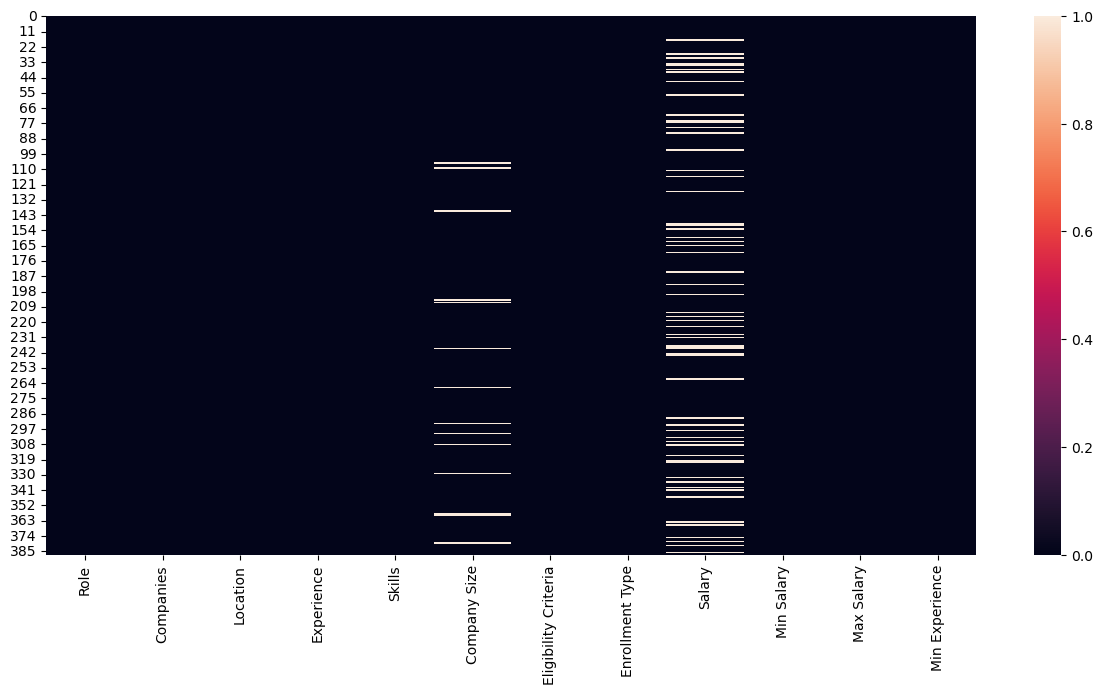

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull())
plt.show()

In [10]:
# Convert columns to numeric values with 'coerce' for errors
df["Company Size"] = pd.to_numeric(df["Company Size"], errors='coerce')
df["Salary"] = pd.to_numeric(df["Salary"], errors='coerce')
df["Min Salary"] = pd.to_numeric(df["Min Salary"], errors='coerce')
df["Max Salary"] = pd.to_numeric(df["Max Salary"], errors='coerce')
df["Min Experience"] = pd.to_numeric(df["Min Experience"], errors='coerce')

In [11]:
df["Company Size"].fillna(0,inplace=True)
df["Salary"].fillna(0,inplace=True)
df["Min Salary"].fillna(0,inplace=True)
df["Max Salary"].fillna(0,inplace=True)
df["Min Experience"].fillna(0,inplace=True)

In [12]:
df.loc[df["Min Salary"]=="#VALUE!"].fillna(0,inplace=True)
df.loc[df["Max Salary"]=="#VALUE!"].fillna(0,inplace=True)

In [13]:
df["Salary"]=df["Min Salary"]+df["Max Salary"]/2

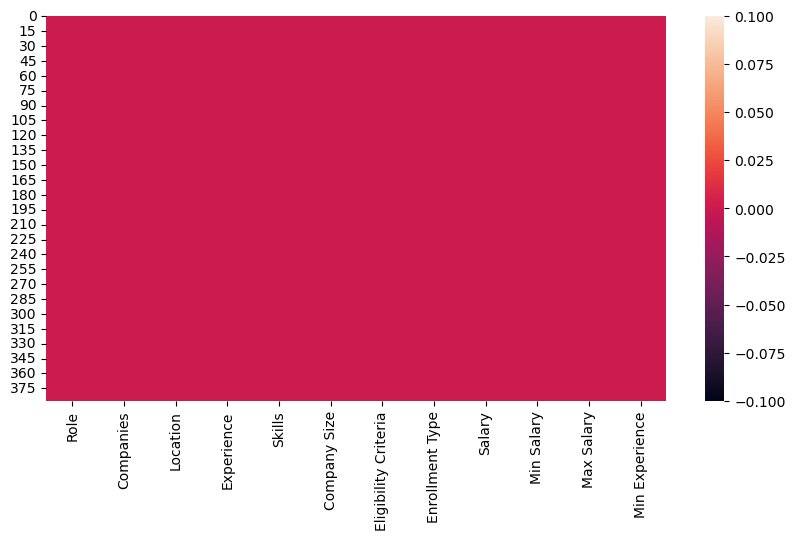

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

In [15]:
df.head(3)

Role                  Companies            Location  \
0             Data Scientist                      2Coms           New Delhi   
1  Machine Learning Engineer                      2Coms              Mumbai   
2             Data Scientist  2Coms Consulting Pvt Ltd.  Chennai, Bengaluru   

    Experience                                             Skills  \
0  2 - 7 years  DataModeling\nEnterpriseApplications\nAnalytic...   
1      0-5 Yrs  Python\nComputerVision\nMachineLearning\nR\nBu...   
2     6-11 Yrs  Machine Learning Code DataScience R Data Model...   

   Company Size Eligibility Criteria Enrollment Type     Salary  Min Salary  \
0         838.0               B.Tech       Freelance  2000000.0   1000000.0   
1        4000.0                   UG       Full Time  3450000.0   1800000.0   
2       10000.0                  Phd       Full Time   252500.0    160000.0   

   Max Salary  Min Experience  
0   2000000.0             2.0  
1   3300000.0             0.0  
2    185000.0             6.0

In [16]:
df['Role'].value_counts().head(10)

Role
Data Scientist                       184
Machine Learning Engineer             94
Data Analyst                          47
Data Engineer                         13
Software Engineer                      8
Artificial Intelligence Architect      5
Python Developer                       3
Machine Learning Architect             3
AWS-MLOps                              1
Automation Tester                      1
Name: count, dtype: int64

<Axes: xlabel='Role'>

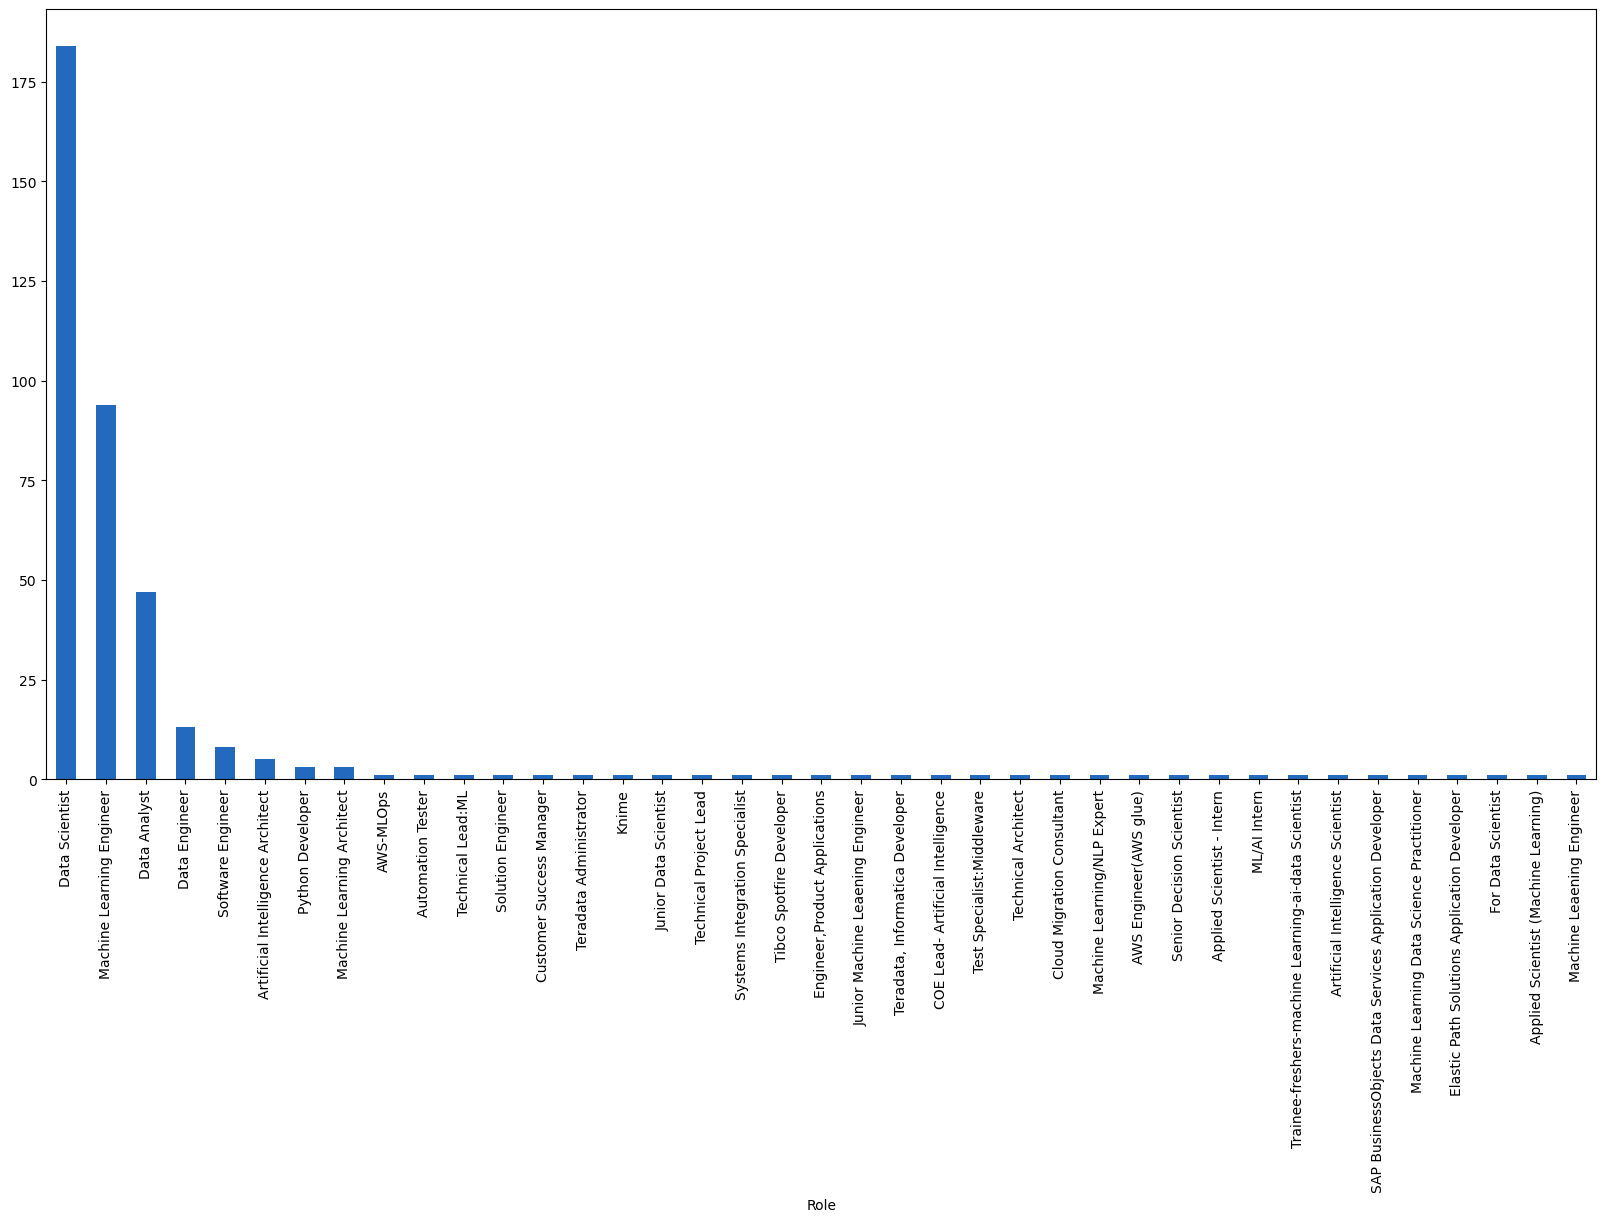

In [17]:
plt.figure(figsize=(20,10))
df["Role"].value_counts().plot(kind='bar',cmap='vlag')

In [18]:
# Saklary distribution

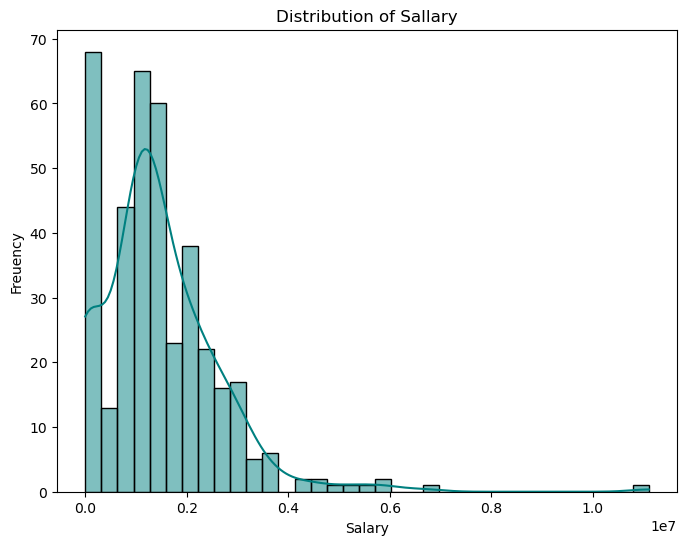

In [19]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x= 'Salary' , kde= True,color='teal')
plt.title(f'Distribution of Sallary')
plt.xlabel("Salary")
plt.ylabel('Freuency')
plt.show()

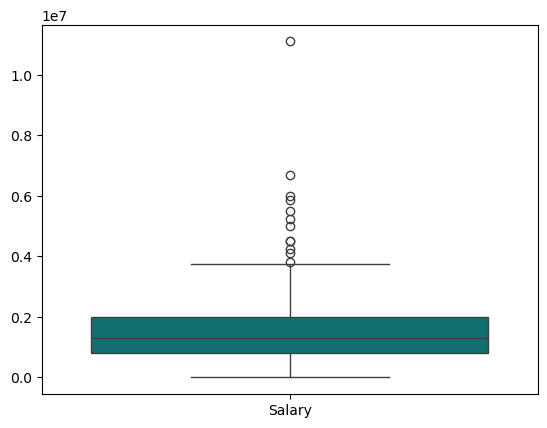

In [20]:
sns.boxplot(data=df[['Salary']],color='teal')
plt.show()

In [21]:
df.columns

Index(['Role', 'Companies', 'Location', 'Experience', 'Skills', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary', 'Min Experience'],
      dtype='object')

In [22]:
Role_min_ex_salary = df.groupby('Role')[['Salary', 'Min Experience']].sum().reset_index()
Role_min_ex_salary.head()

Role     Salary  Min Experience
0                AWS Engineer(AWS glue)   800000.0             6.0
1                             AWS-MLOps  2925000.0             6.0
2  Applied Scientist (Machine Learning)  2050000.0            10.0
3            Applied Scientist - Intern  1975000.0             0.0
4     Artificial Intelligence Architect  8350000.0            32.0

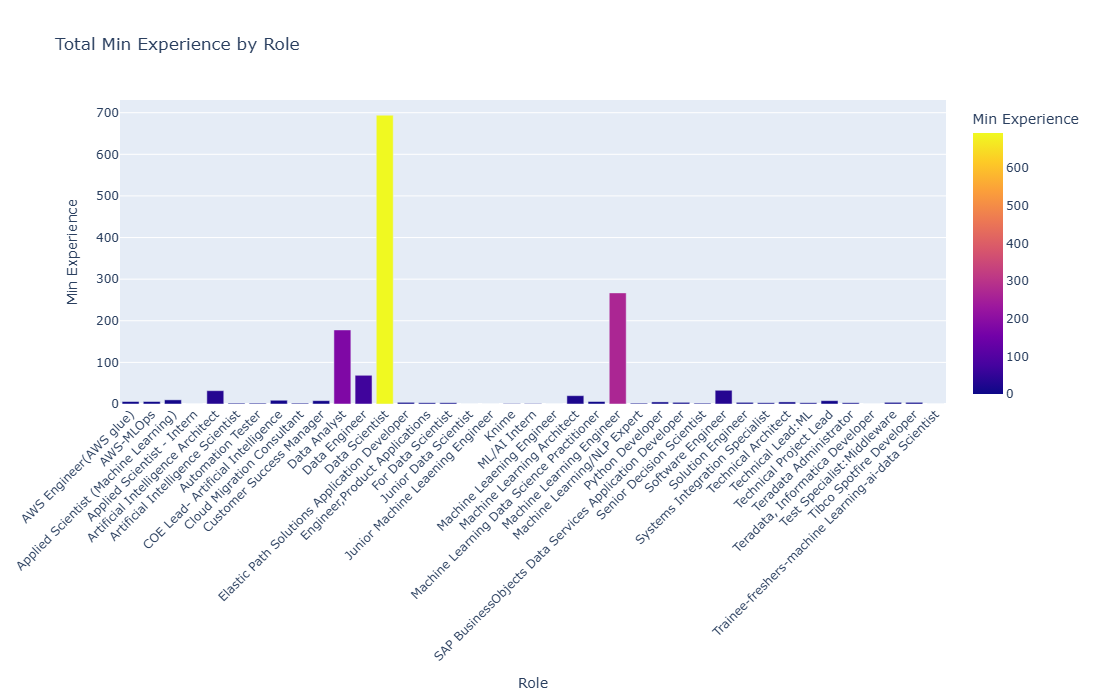

In [23]:
import plotly.express as px
fig = px.bar(Role_min_ex_salary, x='Role', y='Min Experience', title="Total Min Experience by Role",
             color='Min Experience') # Optional: Color bars based on value
fig.update_layout(width=990,height=700,xaxis_tickangle=-45)
fig.show()

<Axes: xlabel='Companies'>

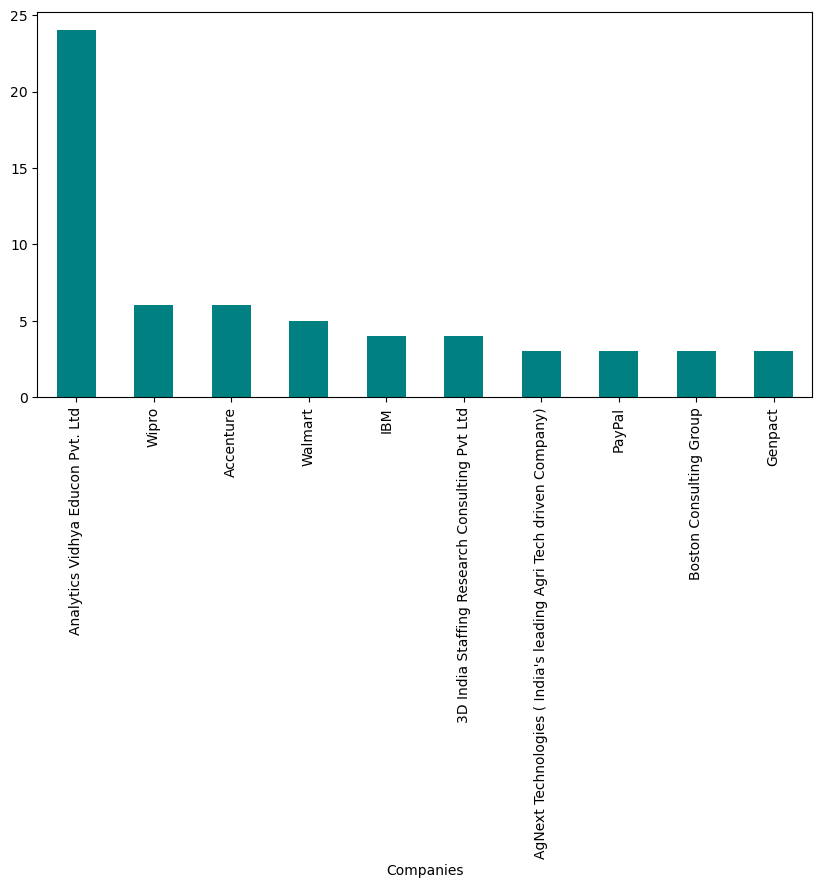

In [24]:
f,ax=plt.subplots(figsize=(10,5))
df['Companies'].value_counts().head(10).plot(kind = 'bar',color="teal")

In [25]:
#role based analysis

In [26]:
#skill analysis

In [27]:
df['Skills'].value_counts().head(10)

Skills
DataScience\nNLP\nMachineLearningAlgorithms                                                                      4
DataModeling\nEnterpriseApplications\nAnalyticalConsultingMachineLearning                                        3
MachineLearning\nPython                                                                                          3
Unix\nSupply chain\nComputer science\nC++\nLinux\nMachine learning\nSPSS\nData mining                            2
data science\nManager Technology\nHTML\nMathematics\nData Analyst\nSPSS\nStatistics\nAnalytics                   2
Java\nR\nPython\nMachineLearning\nDataAnalytics\nScala\nBigData\nSpark                                           2
Machine learning                                                                                                 2
DataScience\nNaturalLanguageProcessing\nDeepLearning\nComputerVision\nSpark                                      2
SAN\nalgorithms\nBusiness operations\nComputer science\nRelationship Exec

<Axes: xlabel='Skills'>

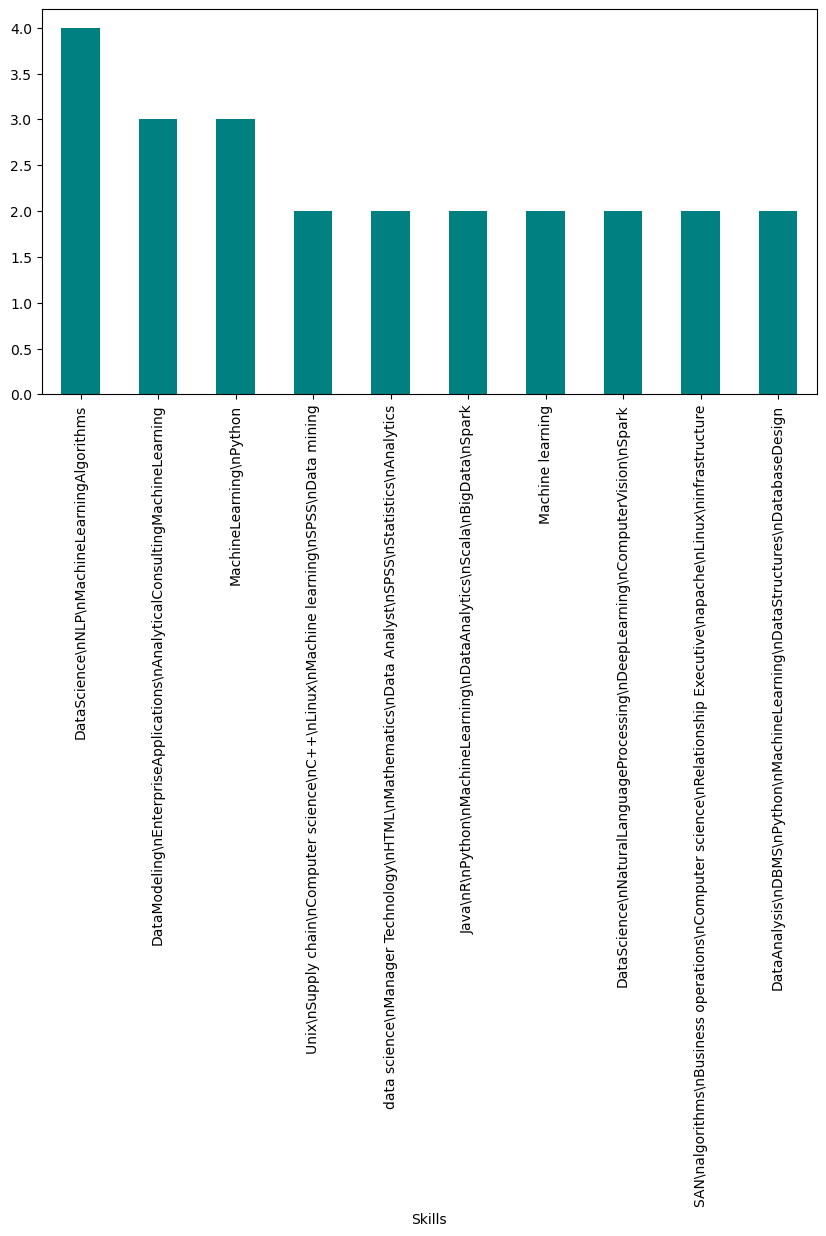

In [28]:
f,ax=plt.subplots(figsize=(10,5))
df['Skills'].value_counts().head(10).plot(kind = 'bar',color='teal')

In [29]:
#location based analysis

In [30]:
df['Location'].value_counts().head(10)

Location
Bengaluru    98
Chennai      58
Hyderabad    28
Mumbai       20
Gurgaon      20
Noida        20
Pune         19
Remote       10
Ahmedabad     5
Delhi         5
Name: count, dtype: int64

<Axes: xlabel='Location'>

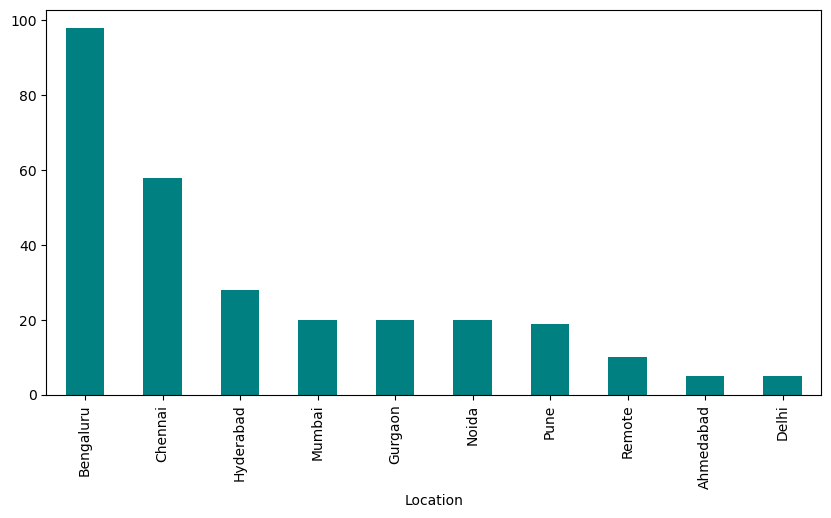

In [31]:
f,ax=plt.subplots(figsize=(10,5))
df['Location'].value_counts().head(10).plot(kind = 'bar',color='teal')

In [32]:
#experience based analysis

In [33]:
df['Eligibility Criteria'].value_counts().head(10)

Eligibility Criteria
UG/PG                                155
UG                                    63
PG/Phd                                54
Any Graduate                          53
PG                                    16
B.Tech                                15
Phd                                   12
UG/PG/PHD                              3
B.Tech/B.E. in Any Specialization      3
B.Tech/MCA/MSc/PhD                     2
Name: count, dtype: int64

In [34]:
#Eligibility Criteria based analysis

<Axes: xlabel='Eligibility Criteria'>

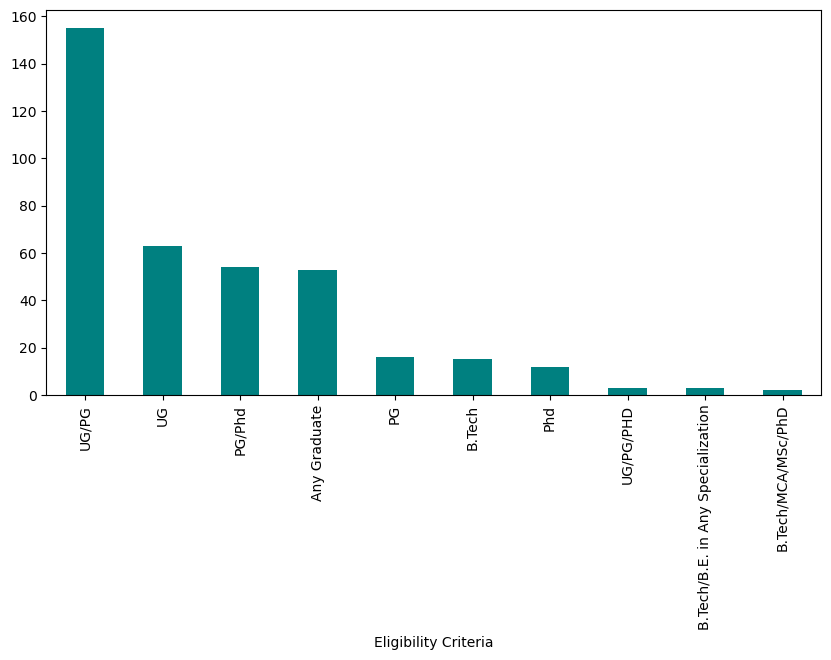

In [35]:
f,ax=plt.subplots(figsize=(10,5))
df['Eligibility Criteria'].value_counts().head(10).plot(kind = 'bar',color='teal')

In [36]:
df['Enrollment Type'].value_counts().head(10)

Enrollment Type
Full Time               307
Full Time, Permanent     76
Full TIme                 3
Freelance                 1
Internship                1
Name: count, dtype: int64

<Axes: xlabel='Enrollment Type'>

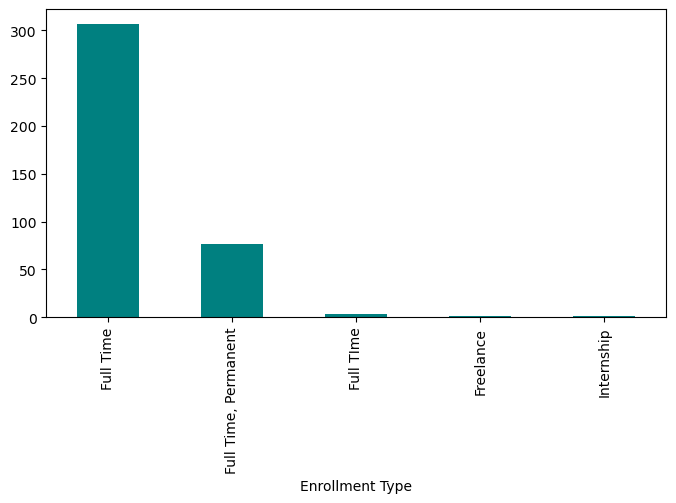

In [37]:
f,ax=plt.subplots(figsize=(8,4))
df['Enrollment Type'].value_counts().head(10).plot(kind = 'bar',color='teal')

In [38]:
#Define which columns are categorical and which are numerical
category_cols = ["Role", "Companies", "Location", "Experience", "Skills", "Eligibility Criteria", "Enrollment Type"]
num_cols = ["Company Size", "Salary", "Min Salary", "Max Salary"]

In [39]:
# Separate features X and target y
X = df.drop(columns=["Min Experience"])
y = df["Min Experience"]

In [40]:
# Create a ColumnTransformer to encode categorical features and scale numerical ones.
preprocessor = ColumnTransformer(
    transformers=[
        ("category", OneHotEncoder(handle_unknown="ignore"), category_cols),
        ("num", StandardScaler(), num_cols)],remainder="passthrough")

In [41]:
# Split data into training and test sets for regression.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(310, 11)

In [43]:
X_test.shape

(78, 11)

In [44]:
y_train.shape

(310,)

In [45]:
y_test.shape

(78,)

In [46]:
# Build a pipeline that first preprocesses data then applies Linear Regression.
reg_pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", LinearRegression())])

In [47]:
# Train the regression model.
reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Role', 'Companies',
                                                   'Location', 'Experience',
                                                   'Skills',
                                                   'Eligibility Criteria',
                                                   'Enrollment Type']),
                                                 ('num', StandardScaler(),
                                                  ['Company Size', 'Salary',
                                                   'Min Salary',
                                                   'Max Salary'])])),
                ('regressor', LinearRegression())])

In [48]:
# Make predictions and evaluate.
y_pred = reg_pipeline.predict(X_test)
y_pred

array([4.20815185, 1.11920698, 2.57384415, 4.12024713, 4.20209043,
       1.82330412, 4.59819843, 2.31798405, 6.09966654, 3.32624652,
       2.95461441, 2.14509614, 3.12139986, 2.68498696, 4.51027129,
       2.93187767, 8.08222575, 3.90330155, 4.89907528, 1.26691856,
       1.02313692, 0.93050316, 7.53239828, 2.59813224, 7.19701422,
       6.18078921, 1.88778717, 1.43288706, 2.47887768, 2.58578395,
       3.04641259, 4.90381486, 3.01851933, 2.53498744, 8.57808651,
       5.70882686, 2.3068764 , 2.26790556, 3.92880382, 4.02675809,
       2.04876612, 2.43786718, 4.58789131, 2.77226388, 2.6839326 ,
       8.37399397, 2.73880507, 1.84238328, 2.70343522, 1.67143017,
       3.5551613 , 1.55264604, 3.13466419, 5.59928316, 6.02389301,
       2.87019417, 3.21929003, 5.24003358, 3.84320832, 6.35015074,
       2.71502099, 3.13560848, 2.25444797, 3.53400142, 1.59948911,
       3.21327068, 2.11569061, 5.31065282, 3.12355109, 2.25820067,
       3.19139077, 1.21762296, 2.02607776, 4.32581016, 7.79332

In [49]:
# Build a pipeline that preprocesses, reduces dimensionality, then clusters.
pca_kmeans_pipeline = Pipeline([
    ("preprocessor", preprocessor), ("pca", PCA(n_components=2)), ("kmeans", KMeans(n_clusters=3, random_state=42, n_init=10))])

In [50]:
# Fit the clustering pipeline on the entire feature set.
pca_kmeans_pipeline.fit(X)

# Retrieve the cluster labels.
cluster_labels = pca_kmeans_pipeline.named_steps["kmeans"].labels_
cluster_labels

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [51]:
# Transform X to the PCA space.
X_pca = pca_kmeans_pipeline.named_steps["pca"].transform(preprocessor.fit_transform(X))
X_pca

array([[ 7.28708516e-01, -1.54729701e-01],
       [ 2.67739277e+00, -4.23649701e-02],
       [-1.58758878e+00, -2.64908817e-01],
       [ 1.09825375e+00, -1.23064849e-01],
       [ 6.00012735e+00,  1.48913031e-01],
       [ 9.52955003e-01, -2.09198794e-01],
       [ 1.35740188e+00, -1.95452210e-01],
       [ 1.21757350e+00, -1.51557731e-01],
       [-7.10399159e-01, -3.21218639e-01],
       [-1.09419461e-01, -2.94562081e-01],
       [-7.52371134e-02, -1.86911923e-01],
       [-7.00883742e-01, -2.55134832e-01],
       [-8.06320300e-01, -2.61335269e-01],
       [ 8.39716014e-01, -1.98308734e-01],
       [ 1.16215768e+00, -1.39051390e-01],
       [ 4.20970718e-01, -1.33296717e-01],
       [-4.23884254e-02, -1.58287261e-01],
       [-1.91569583e+00, -2.28440564e-01],
       [-2.51039717e-01, -3.35311919e-01],
       [-5.12795014e-01, -3.48634036e-01],
       [-8.35695394e-01, -2.78434297e-01],
       [-1.06866211e-01, -2.89696725e-01],
       [ 5.64426854e-01, -2.07738121e-01],
       [ 2.

In [52]:
# Create a DataFrame for the PCA-transformed data
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = cluster_labels

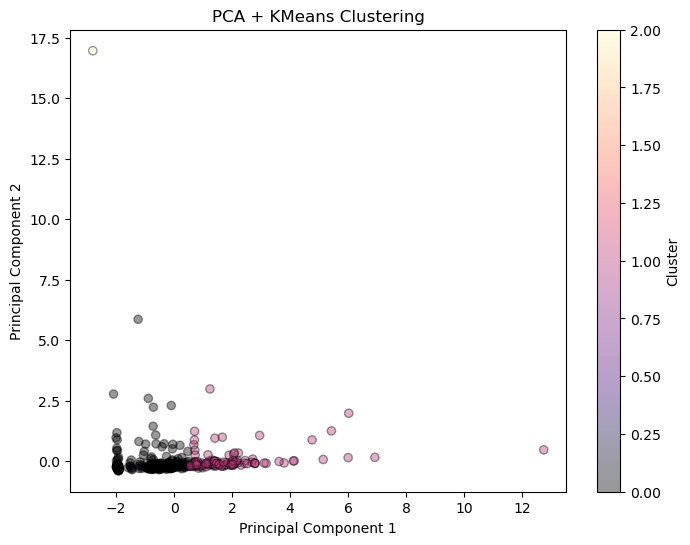

In [53]:
# Plot the clusters in PCA space.
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster"], cmap="magma", edgecolors="k", alpha=0.4)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA + KMeans Clustering")
plt.colorbar(label="Cluster")
plt.show()

In [54]:
df["Label"] = cluster_labels

In [55]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#  numeric, convert to string for hue.
if "Label" not in numeric_cols:
    numeric_cols.append("Label")

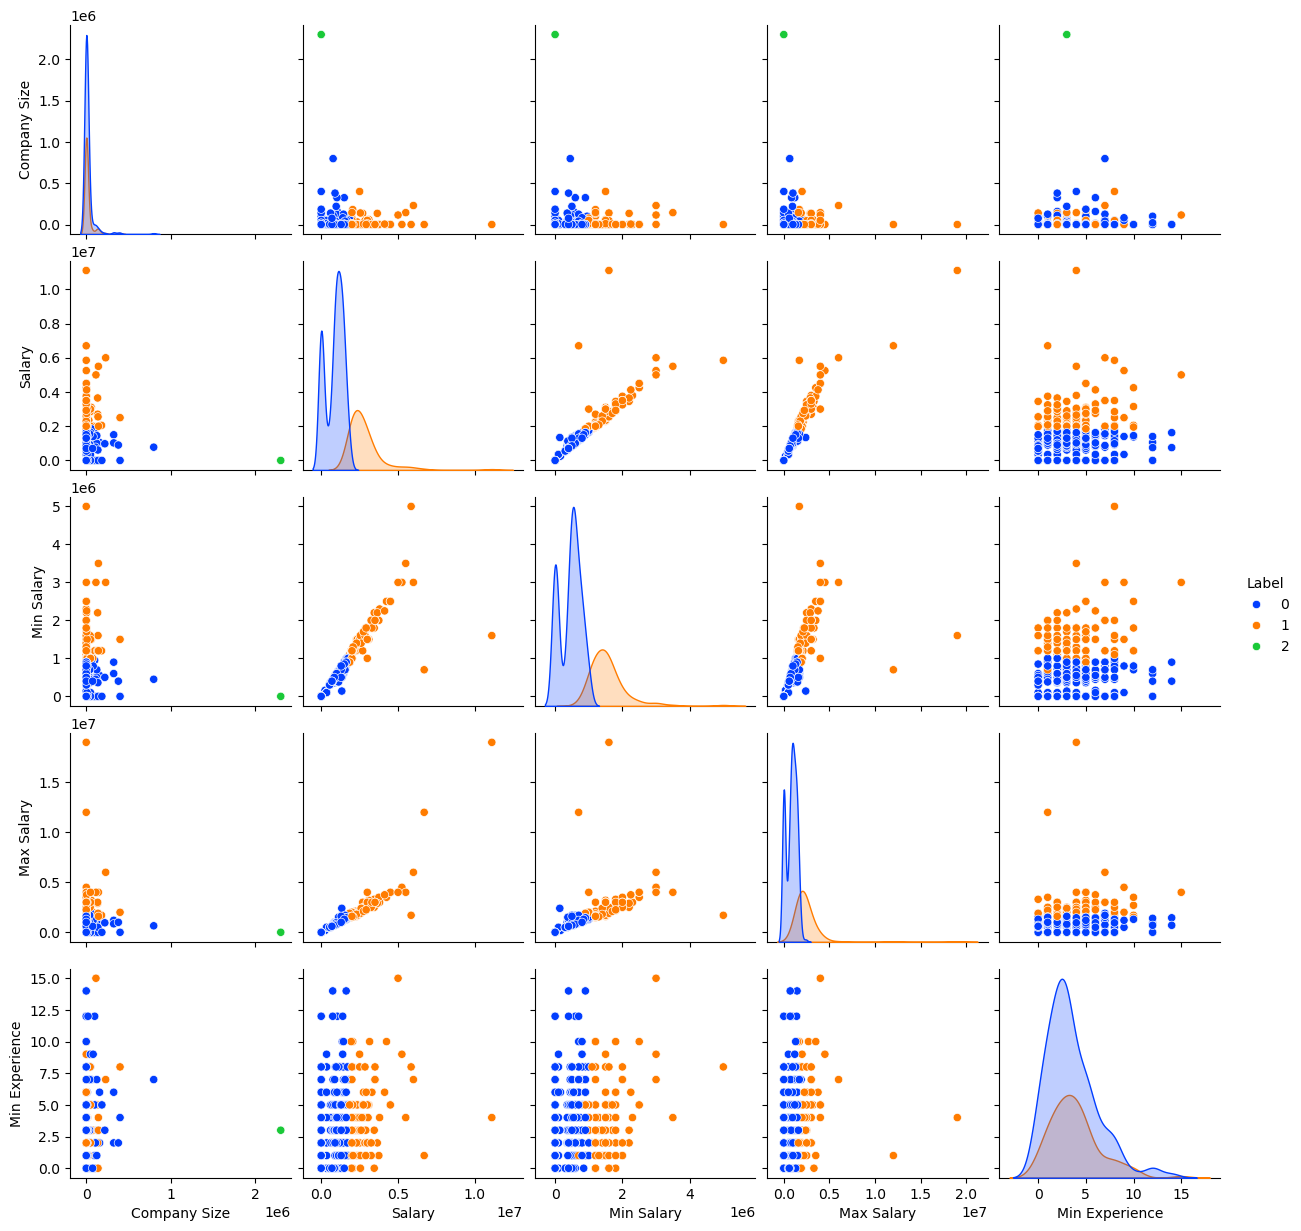

In [56]:
# Create the pairplot
sns.pairplot(df[numeric_cols], hue="Label", palette="bright")
plt.show()

In [57]:
print("Regression Model Metrics:")
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Regression Model Metrics:
Mean Squared Error: 2.354310514193375
Mean Absolute Error: 1.1285766600695408
R-squared: 0.6183623263254692


In [58]:
sil_score = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score on PCA-transformed data:", sil_score)

Silhouette Score on PCA-transformed data: 0.5412875385430211
